In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import ceil

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Get cat and dog images
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
SHUFFLE_BUFFER_SIZE = 1000

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
print(total_train)
print(total_val)
print(total_test)

2001
1001
51


In [18]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255
)
validation_image_generator = ImageDataGenerator(
    rescale = 1./255
)
test_image_generator = ImageDataGenerator(
    rescale = 1./255 
)

train_data_gen = train_image_generator.flow_from_directory(
        '/content/cats_and_dogs/train',
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
        '/content/cats_and_dogs/validation',
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
        '/content/cats_and_dogs',
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        classes = ['test'],
        shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


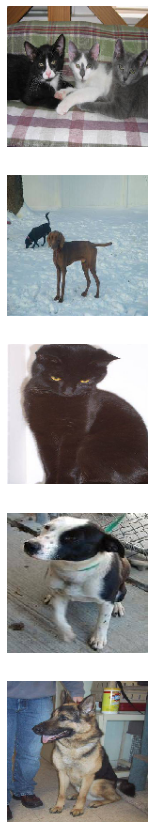

In [5]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [23]:
train_image_generator =  ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.17, 
    zoom_range = 0.14, 
    rotation_range = 28,
    height_shift_range = 0.1, 
    width_shift_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True)

Found 2000 images belonging to 2 classes.


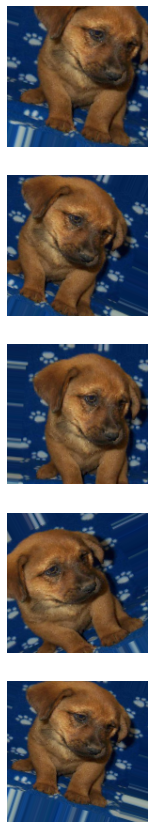

In [24]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='/content/cats_and_dogs/train',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [25]:
model = Sequential()

model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(160, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(192, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy']
              )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [26]:
steps_per_epoch = total_train//batch_size
validation_steps = total_val//batch_size

print(steps_per_epoch)
print(validation_steps)

15
7


In [27]:
history = model.fit(
            train_data_gen, 
            steps_per_epoch = steps_per_epoch,
            validation_data=val_data_gen, 
            validation_steps = validation_steps,
            epochs=epochs)

Epoch 1/15
15/15 [==============================] - 17s 1s/step - loss: 0.7659 - accuracy: 0.4915 - val_loss: 0.7193 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 16s 1s/step - loss: 0.6870 - accuracy: 0.5406 - val_loss: 0.6784 - val_accuracy: 0.5569
Epoch 3/15
15/15 [==============================] - 16s 1s/step - loss: 0.6770 - accuracy: 0.5775 - val_loss: 0.6867 - val_accuracy: 0.5167
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.6711 - accuracy: 0.5791 - val_loss: 0.6545 - val_accuracy: 0.5748
Epoch 5/15
15/15 [==============================] - 16s 1s/step - loss: 0.6600 - accuracy: 0.6159 - val_loss: 0.6663 - val_accuracy: 0.5859
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6645 - accuracy: 0.5903 - val_loss: 0.6493 - val_accuracy: 0.6138
Epoch 7/15
15/15 [==============================] - 16s 1s/step - loss: 0.6387 - accuracy: 0.6138 - val_loss: 0.6504 - val_accuracy: 0.6451
Epoch 8/15
15/15 [==

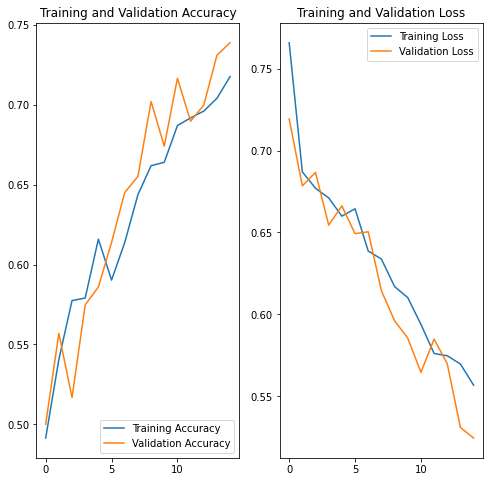

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
print(max(history.history['accuracy']))

0.7177083492279053


In [30]:
probabilities = model.predict(test_data_gen).flatten()
print(probabilities)

[0.29104125 0.1123376  0.1434862  0.8802315  0.59259284 0.5474881
 0.3187047  0.1832342  0.839888   0.9497345  0.40165037 0.9524716
 0.45245743 0.4744502  0.44698396 0.49860278 0.62749076 0.7372289
 0.57292944 0.70677143 0.27021044 0.5466299  0.73185307 0.8823354
 0.7763025  0.28854758 0.38159406 0.30990794 0.13620217 0.66750854
 0.5077218  0.1927421  0.70251644 0.9927717  0.14107572 0.3758911
 0.9993279  0.7871056  0.53476274 0.43847486 0.36601034 0.4052843
 0.7526831  0.32769424 0.47932214 0.3519993  0.51693684 0.09822425
 0.5514942  0.18612973]


In [34]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.68% of the images of cats and dogs.
You passed the challenge!
